# **Module 1**

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string
import re
from bs4 import BeautifulSoup
!pip install contractions
!pip install nltk
import nltk
import contractions
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import HashingVectorizer


     |████████████████████████████████| 327kB 4.4MB/s 
     |████████████████████████████████| 266kB 7.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85391 sha256=8e5f22677c5cd6925a2fdb1395129ae742bbc0392a8e7118fbf990dd0be19a7b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
#readin the data from file and generate dataframe
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Amazon_Instant_Video_5.json.gz')
print(df['reviewText'][0:10])

reviewText = np.array(df.reviewText)
print(reviewText[0:10])
ratings = np.array(df.overall)
print(ratings[0:10])

#converting rating to good('1') and bad('0')
for i in range(len(ratings)):
  if ratings[i]>3:
    ratings[i] = 1
  else:
    ratings[i] = 0  
print(ratings[0:10])

0    I had big expectations because I love English ...
1    I highly recommend this series. It is a must f...
2    This one is a real snoozer. Don't believe anyt...
3    Mysteries are interesting.  The tension betwee...
4    This show always is excellent, as far as briti...
5    I discovered this series quite by accident. Ha...
6    It beats watching a blank screen. However, I j...
7    There are many episodes in this series, so I p...
8    This is the best of the best comedy Stand-up. ...
9    Not bad.  Didn't know any of the comedians but...
Name: reviewText, dtype: object
["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.'
 "This one is a real snoozer. Don't believe anything you read or 

In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def preprocess_string(s):
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)
  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  # replace digits with no space
  s = re.sub(r"\d", '', s)
  #lemmatization
  return lemmatizer.lemmatize(s)

def replace_contactions(text):
  return contractions.fix(text)

#building the vocabulary
word_list = []
review_array = []
for sentence in reviewText:
  sentence = replace_contactions(sentence)
  sentence_array = []
  for word in sentence.lower().split():
    word = preprocess_string(word)
    # print(word)
    sentence_array.append(word)
    word_list.append(word)
  review_array.append(sentence_array)
corpus = Counter(word_list)
print(len(corpus))
print(review_array[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
81301
['i', 'had', 'big', 'expectation', 'because', 'i', 'love', 'english', 'tv', 'in', 'particular', 'investigative', 'and', 'detective', 'stuff', 'but', 'this', 'guy', 'is', 'really', 'boring', 'it', 'did', 'not', 'appeal', 'to', 'me', 'at', 'all']


In [ ]:
print(corpus)

Counter({'the': 187293, 'a': 112623, 'and': 102688, 'to': 83845, 'is': 82293, 'of': 77463, 'i': 68772, 'it': 63647, 'this': 45943, 'in': 44511, 'that': 39686, 'not': 39614, '': 30814, 'show': 29917, 'for': 28111, 'with': 26906, 'but': 26192, 'are': 24496, 'wa': 24222, 'on': 22676, 'you': 22296, 'have': 21022, 'season': 19477, 'they': 16902, 'be': 16030, 'one': 14949, 'like': 14811, 'all': 14088, 'character': 13553, 'so': 13345, 'he': 12886, 'series': 12474, 'episode': 12378, 'good': 12347, 'more': 12330, 'his': 12066, 'ha': 11545, 'will': 11454, 'just': 11267, 'do': 11154, 'at': 11115, 'there': 10958, 'an': 10947, 'who': 10840, 'from': 10704, 'great': 10348, 'if': 10289, 'what': 10169, 'can': 10033, 'my': 10009, 'would': 9970, 'or': 9722, 'story': 9610, 'some': 9558, 'love': 9501, 'about': 9469, 'by': 9384, 'very': 9273, 'out': 9180, 'get': 9146, 'really': 9021, 'movie': 8929, 'watch': 8895, 'time': 8580, 'up': 8378, 'her': 8353, 'we': 8143, 'am': 7853, 'see': 7692, 'film': 7628, 'thei

In [ ]:
from nltk.util import ngrams
n = 2
n_grams = ngrams(word_list, n)
n_corpus = Counter(n_grams)
print(n_corpus.most_common()[0:100])

[(('of', 'the'), 20946), (('it', 'is'), 16592), (('in', 'the'), 11476), (('is', 'a'), 11442), (('this', 'show'), 8562), (('and', 'the'), 8523), (('the', 'show'), 7056), (('i', 'am'), 7021), (('to', 'the'), 6788), (('this', 'is'), 6699), (('to', 'be'), 6529), (('do', 'not'), 5989), (('i', 'have'), 5424), (('for', 'the'), 5350), (('on', 'the'), 5349), (('is', 'not'), 4966), (('with', 'the'), 4824), (('season', ''), 4706), (('and', 'i'), 4526), (('it', 'wa'), 4513), (('to', 'see'), 4482), (('the', 'character'), 4480), (('is', 'the'), 4415), (('if', 'you'), 4337), (('to', 'watch'), 4172), (('there', 'is'), 4152), (('in', 'a'), 3947), (('one', 'of'), 3884), (('the', 'first'), 3848), (('that', 'is'), 3761), (('the', 'story'), 3662), (('of', 'a'), 3518), (('did', 'not'), 3511), (('i', 'wa'), 3495), (('this', 'series'), 3483), (('i', 'would'), 3439), (('with', 'a'), 3396), (('can', 'not'), 3317), (('from', 'the'), 3227), (('a', 'good'), 3202), (('i', 'love'), 3191), (('all', 'the'), 3175), (('

In [ ]:
n = 3
n_grams = ngrams(word_list, n)
n_corpus = Counter(n_grams)
print(n_corpus.most_common()[0:100])

[(('it', 'is', 'a'), 2340), (('one', 'of', 'the'), 2237), (('this', 'is', 'a'), 2203), (('i', 'do', 'not'), 2143), (('a', 'lot', 'of'), 1837), (('some', 'of', 'the'), 1492), (('this', 'show', 'is'), 1426), (('it', 'is', 'not'), 1379), (('i', 'did', 'not'), 1183), (('but', 'it', 'is'), 1152), (('i', 'can', 'not'), 1134), (('is', 'one', 'of'), 1101), (('if', 'you', 'are'), 1081), (('can', 'not', 'wait'), 1077), (('love', 'this', 'show'), 1062), (('there', 'is', 'a'), 1047), (('i', 'am', 'not'), 1030), (('of', 'the', 'show'), 998), (('to', 'be', 'a'), 969), (('the', 'show', 'is'), 929), (('is', 'a', 'great'), 915), (('the', 'first', 'season'), 878), (('and', 'it', 'is'), 870), (('the', 'character', 'are'), 868), (('of', 'the', 'best'), 828), (('is', 'not', 'a'), 819), (('the', 'end', 'of'), 785), (('i', 'love', 'the'), 771), (('the', 'rest', 'of'), 766), (('a', 'well', 'a'), 759), (('i', 'love', 'this'), 742), (('the', 'story', 'line'), 730), (('i', 'have', 'seen'), 723), (('this', 'is', 

In [ ]:
frequency = np.array(sorted(corpus.values(),reverse=True))
x_axis = np.array(range(1,len(frequency)+1))
print("frequency: ",frequency)
print("rank: ",x_axis)
frequency = np.log(frequency)
print("frequency in log: ",frequency)
x_axis = np.log(x_axis)
print("rank in log: ",x_axis)

frequency:  [187293 112623 102688 ...      1      1      1]
rank:  [    1     2     3 ... 81299 81300 81301]
frequency in log:  [12.14042951 11.63180124 11.53945054 ...  0.          0.
  0.        ]
rank in log:  [ 0.          0.69314718  1.09861229 ... 11.305889   11.3059013
 11.3059136 ]


[[14.92857098]
 [13.98074323]
 [13.42629954]
 ...
 [-0.5314    ]
 [-0.53141682]
 [-0.53143364]]


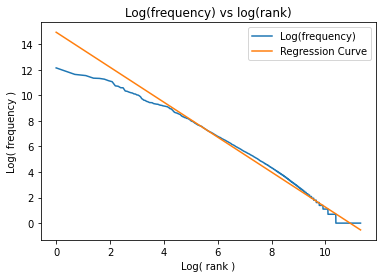

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_axis.reshape(-1,1), frequency.reshape(-1,1))
pred_list = []
y_axis = reg.predict(x_axis.reshape(-1,1))
print(y_axis)
#plt.figure(figsize=(16, 9))
plt.figure()
plt.plot(x_axis,frequency,label='frequency')
plt.plot(x_axis,y_axis,label='best fit')
plt.xlabel('Log( rank )')
plt.ylabel('Log( frequency )')
plt.title("Log(frequency) vs log(rank)")
legend = []
legend.append("Log(frequency)")
legend.append("Regression Curve")
plt.legend(legend, loc='upper right')
plt.show()

In [ ]:
#extracting the useful words from the corpus and removing others
corpus = corpus.most_common()[150:15000]
print(corpus)

[('something', 2956), ('real', 2946), ('line', 2940), ('family', 2893), ('scene', 2886), ('u', 2865), ('another', 2851), ('enjoy', 2837), ('made', 2827), ('funny', 2824), ('bit', 2811), ('star', 2811), ('watched', 2799), ('those', 2741), ('fan', 2705), ('few', 2680), ('guy', 2679), ('though', 2634), ('through', 2582), ('part', 2574), ('next', 2543), ('here', 2493), ('seen', 2484), ('feel', 2479), ('enough', 2477), ('hope', 2473), ('seems', 2440), ('old', 2436), ('amazon', 2382), ('why', 2366), ('last', 2357), ('drama', 2354), ('should', 2335), ('same', 2310), ('need', 2291), ('day', 2273), ('pretty', 2248), ('far', 2245), ('done', 2238), ('got', 2210), ('between', 2209), ('before', 2180), ('both', 2165), ('may', 2156), ('worth', 2134), ('writing', 2129), ('start', 2128), ('enjoyed', 2120), ('action', 2119), ('again', 2116), ('world', 2105), ('thought', 2091), ('down', 2087), ('right', 2074), ('own', 2066), ('woman', 2060), ('man', 2053), ('play', 2051), ('such', 2024), ('found', 2020),

In [ ]:
corpus = dict(corpus)
print(corpus)


{'something': 2956, 'real': 2946, 'line': 2940, 'family': 2893, 'scene': 2886, 'u': 2865, 'another': 2851, 'enjoy': 2837, 'made': 2827, 'funny': 2824, 'bit': 2811, 'star': 2811, 'watched': 2799, 'those': 2741, 'fan': 2705, 'few': 2680, 'guy': 2679, 'though': 2634, 'through': 2582, 'part': 2574, 'next': 2543, 'here': 2493, 'seen': 2484, 'feel': 2479, 'enough': 2477, 'hope': 2473, 'seems': 2440, 'old': 2436, 'amazon': 2382, 'why': 2366, 'last': 2357, 'drama': 2354, 'should': 2335, 'same': 2310, 'need': 2291, 'day': 2273, 'pretty': 2248, 'far': 2245, 'done': 2238, 'got': 2210, 'between': 2209, 'before': 2180, 'both': 2165, 'may': 2156, 'worth': 2134, 'writing': 2129, 'start': 2128, 'enjoyed': 2120, 'action': 2119, 'again': 2116, 'world': 2105, 'thought': 2091, 'down': 2087, 'right': 2074, 'own': 2066, 'woman': 2060, 'man': 2053, 'play': 2051, 'such': 2024, 'found': 2020, 'around': 2008, 'writer': 2007, 'long': 2000, 'different': 1988, 'wait': 1984, 'since': 1981, 'ever': 1978, 'set': 1976

In [ ]:
new_list = []
for i in range(len(review_array)):
  str1 = ""
  for word in review_array[i]:
    if corpus.get(word):
      str1 = str1 + word+ " "
  new_list.append(str1)
review_array = new_list
print(review_array[1])

highly recommend must anyone yearning grown television complex totally involved thank prime 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lower_case = reviewText[1].lower()
tokens = nltk.word_tokenize(lower_case)
print(lower_case)
print(nltk.pos_tag(tokens))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
i highly recommend this series. it is a must for anyone who is yearning to watch "grown up" television. complex characters and plots to keep one totally involved. thank you amazin prime.
[('i', 'NN'), ('highly', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('series', 'NN'), ('.', '.'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('must', 'MD'), ('for', 'IN'), ('anyone', 'NN'), ('who', 'WP'), ('is', 'VBZ'), ('yearning', 'VBG'), ('to', 'TO'), ('watch', 'VB'), ('``', '``'), ('grown', 'VBN'), ('up', 'RP'), ("''", "''"), ('television', 'NN'), ('.', '.'), ('complex', 'JJ'), ('characters', 'NNS'), ('and', 'CC'), ('plots', 'NNS'), ('to', 'TO'), ('keep', 'VB'), ('one', 'CD'), ('totally', 'RB'), ('involved', 'JJ'), ('.', '.'), ('thank'

# **Module 2**

In [ ]:
#CountVectorization

def count_vectorization(text):
  # Create a Vectorizer Object
  vectorizer = CountVectorizer()

  # text = reviewText[0:10]
  # print(text)
 
  vectorizer.fit(text)
  # Printing the identified Unique words along with their indices
  print("Vocabulary: ", vectorizer.vocabulary_)

  # Encode the Document
  vector = vectorizer.transform(text)
  
  # Summarizing the Encoded Texts
  print("Encoded Reviews is:")
  enc = vector.toarray()
  # type(enc)
  print(vector.toarray())
  return vector

#TF-IDF
def cal_tfidf(text):
  from sklearn.feature_extraction.text import TfidfVectorizer
  # create the transform
  vectorizer = TfidfVectorizer()
  # tokenize and build vocab
  vectorizer.fit(text)
  # summarize
  print(vectorizer.vocabulary_)
  print(vectorizer.idf_)
  # encode document
  vector = vectorizer.transform(text)
  # summarize encoded vector
  # print(vector.shape)
  # print(vector.toarray())
  return vector

#Hash Vecotrization
def hashvec(text):
  vectorizer  = HashingVectorizer(n_features=20)
  vector = vectorizer.transform(text)
  return vector

#confusion matrix
def conf_matrix(y_test,y_pred):
  return ((confusion_matrix(y_test, y_pred)))

#Accuracy calculations
def cal_acc(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

#f1 Score
def cal_f1_score(y_test,y_pred):
  score = f1_score(y_test, y_pred, average='binary')
  return score

#Decision Tree
def decisiontree(X_train,y_train ,X_test, y_test):
  from sklearn.tree import DecisionTreeClassifier
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  
  print("confusion matrix: \n",conf_matrix(y_test, y_pred))
  print("accuracy: ",cal_acc(y_test, y_pred))
  print("f1 score: ",cal_f1_score(y_test, y_pred))


# Logistic Regression
def logisticregression(X_train, y_train , X_test, y_test):

  from sklearn.linear_model import LogisticRegression

  logistic_regression = LogisticRegression(max_iter= 500)
  logistic_regression.fit(X_train,y_train)
  y_pred = logistic_regression.predict(X_test)
  print("confusion matrix: \n",conf_matrix(y_test, y_pred))
  print("accuracy: ",cal_acc(y_test, y_pred))
  print("f1 score: ",cal_f1_score(y_test, y_pred))


In [ ]:
def naivebayes(X_train,y_train ,X_test, y_test):
  from sklearn.naive_bayes import GaussianNB
  x = X_train.toarray()
  X_test = X_test.toarray()
  GausNB = GaussianNB()
  GausNB.fit(x, y_train)
  y_pred = GausNB.predict(X_test)
  print("confusion matrix: \n",conf_matrix(y_test, y_pred))
  print("accuracy: ",cal_acc(y_test, y_pred))
  print("f1 score: ",cal_f1_score(y_test, y_pred))

In [ ]:
vect = [count_vectorization ,cal_tfidf, hashvec]
classifier = [decisiontree , logisticregression,naivebayes]

for v in vect:
  y = ratings
  X = v(review_array)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  for c in classifier:
    print("Results for",v.__name__ ,"and classifier",c.__name__ )
    c(X_train , y_train ,X_test, y_test)
    print()



Vocabulary:  {'big': 1261, 'expectation': 4652, 'english': 4355, 'particular': 9502, 'investigative': 6921, 'detective': 3507, 'stuff': 12711, 'guy': 5860, 'boring': 1475, 'appeal': 626, 'highly': 6180, 'recommend': 10652, 'must': 8694, 'anyone': 599, 'yearning': 14743, 'grown': 5812, 'television': 13126, 'complex': 2530, 'totally': 13470, 'involved': 6932, 'thank': 13210, 'prime': 10131, 'real': 10589, 'believe': 1173, 'anything': 601, 'read': 10583, 'hear': 6047, 'awful': 931, 'idea': 6455, 'title': 13384, 'mean': 8222, 'neither': 8829, 'mystery': 8717, 'tension': 13161, 'between': 1238, 'robson': 11160, 'tall': 13033, 'blond': 1375, 'believable': 1171, 'often': 9123, 'seemed': 11611, 'uncomfortable': 13778, 'excellent': 4591, 'far': 4817, 'british': 1609, 'crime': 2982, 'ever': 4542, 'made': 7942, 'done': 3856, 'top': 13437, 'notch': 8959, 'twist': 13706, 'realistic': 10591, 'brutal': 1654, 'storyline': 12632, 'pull': 10336, 'punch': 10345, 'enters': 4396, 'twisted': 13707, 'mind': 

# **Module 3**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#getting data vectors using count vectorization
data_vectors = count_vectorization(review_array)

n_topic = [1,2,3,4,5]

for n in n_topic:
  LDA = LatentDirichletAllocation(n_components=n, random_state=42)
  LDA.fit(data_vectors)
  print("perplexity for n=",n,":", LDA.perplexity(data_vectors))


Vocabulary:  {'big': 1261, 'expectation': 4652, 'english': 4355, 'particular': 9502, 'investigative': 6921, 'detective': 3507, 'stuff': 12711, 'guy': 5860, 'boring': 1475, 'appeal': 626, 'highly': 6180, 'recommend': 10652, 'must': 8694, 'anyone': 599, 'yearning': 14743, 'grown': 5812, 'television': 13126, 'complex': 2530, 'totally': 13470, 'involved': 6932, 'thank': 13210, 'prime': 10131, 'real': 10589, 'believe': 1173, 'anything': 601, 'read': 10583, 'hear': 6047, 'awful': 931, 'idea': 6455, 'title': 13384, 'mean': 8222, 'neither': 8829, 'mystery': 8717, 'tension': 13161, 'between': 1238, 'robson': 11160, 'tall': 13033, 'blond': 1375, 'believable': 1171, 'often': 9123, 'seemed': 11611, 'uncomfortable': 13778, 'excellent': 4591, 'far': 4817, 'british': 1609, 'crime': 2982, 'ever': 4542, 'made': 7942, 'done': 3856, 'top': 13437, 'notch': 8959, 'twist': 13706, 'realistic': 10591, 'brutal': 1654, 'storyline': 12632, 'pull': 10336, 'punch': 10345, 'enters': 4396, 'twisted': 13707, 'mind': 

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(review_array)
data_vectors = vectorizer.transform(review_array)

LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(data_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-200:]])
    print('\n')

words for topic #0:
['educational', 'superb', 'fact', 'kind', 'hilarious', 'man', 'seem', 'believe', 'modern', 'interaction', 'team', 'easy', 'viking', 'fantastic', 'may', 'type', 'production', 'engaging', 'archer', 'cop', 'big', 'live', 'second', 'entire', 'truly', 'violence', 'attention', 'period', 'justified', 'setting', 'interested', 'until', 'value', 'parent', 'few', 'having', 'boy', 'reality', 'exciting', 'problem', 'edge', 'quality', 'full', 'beautiful', 'absolutely', 'should', 'become', 'case', 'often', 'available', 'down', 'spy', 'laugh', 'along', 'glad', 'bosch', 'star', 'set', 'however', 'read', 'lead', 'everyone', 'situation', 'yet', 'side', 'development', 'law', 'thought', 'issue', 'coming', 'smart', 'around', 'getting', 'ever', 'believable', 'long', 'hard', 'miss', 'husband', 'british', 'interest', 'help', 'perfect', 'american', 'age', 'feel', 'start', 'quite', 'writer', 'sure', 'learn', 'sometimes', 'week', 'top', 'continues', 'three', 'acted', 'play', 'again', 'true', '

In [ ]:
topic_values = LDA.transform(data_vectors)
print(topic_values.shape)
print(topic_values)

(37126, 3)
[[0.47804829 0.48600783 0.03594387]
 [0.94419288 0.02800512 0.027802  ]
 [0.03339158 0.93354419 0.03306423]
 ...
 [0.00671464 0.98654331 0.00674204]
 [0.39639575 0.5632977  0.04030655]
 [0.01359892 0.97293573 0.01346535]]


In [ ]:
topic_column = topic_values.argmax(axis=1)
print(topic_column)

[1 0 1 ... 1 1 1]


In [ ]:
good_review_list = []
bad_review_list = []

#topic 0 analysis
bad_count = 0
good_count = 0
sentence_list = []
for i in range(len(topic_column)):
  if topic_column[i] == 0:
    #print("Sentence under topic 0 : ",reviewText[i])
    sentence_list.append(reviewText[i])
    if ratings[i] == 0:
      bad_count += 1
    else:
      good_count += 1
good_review_list.append(good_count)
bad_review_list.append(bad_count)
print("sentences(count = 10) under topic 0\n",sentence_list[0:10])

#topic 1 analysis
bad_count = 0
good_count = 0
sentence_list = []
for i in range(len(topic_column)):
  if topic_column[i] == 1:
    #print("Sentence under topic 1 : ",reviewText[i])
    sentence_list.append(reviewText[i])
    if ratings[i] == 0:
      bad_count += 1
    else:
      good_count += 1
good_review_list.append(good_count)
bad_review_list.append(bad_count)
print("sentences(count = 10) under topic 1\n",sentence_list[0:10])

#topic 2 analysis
bad_count = 0
good_count = 0
sentence_list = []
for i in range(len(topic_column)):
  if topic_column[i] == 2:
    #print("Sentence under topic 2 : ",reviewText[i])\
    sentence_list.append(reviewText[i])
    if ratings[i] == 0:
      bad_count += 1
    else:
      good_count += 1
good_review_list.append(good_count)
bad_review_list.append(bad_count)
print("sentences(count = 10) under topic 2\n",sentence_list[0:10])

print("topic-wise good review count:",good_review_list)
print("topic-wise bad review count:",bad_review_list)

sentences(count = 10) under topic 0
 ['I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.', 'if this had to do with Dat Phan, he was hilarious, I enjoyed his comedy and would watch him alone numerous times', "he's OK. His humor consists mainly of varying between a Vietnamese accent and a smooth articulate presentation of ironic situations.", 'Great variety of good comics. Each show is just the right length to not get boring. The comics are really funny too.', 'The show is a little bit dry, but is definitely funny.Have only seen the first four episodes, and they were definitely funny enough to continue watching the series.Characters are easy to relate to as they are about my age, funny stuff.', 'Gave this to a good friend and ordered another for myself.  Very funny!  I highly recommend this for anyone who enjoys irony and a good laugh.', 'Watched Charli

In [ ]:
print("percentage bad to good review topic wise:\n")
for i in range(3):
  print("topic",i,(bad_review_list[i]/good_review_list[i])*100,"%")
  

percentage bad to good review topic wise:

topic 0 7.756750691899169 %
topic 1 51.30873866446826 %
topic 2 28.32508382564266 %
